# PROBLEM SET 3
## Syed Ashfak Ahmed
## 200528116

## Q1
### Step 1


In [16]:
import numpy as np
import pandas as pd


### Step 2

In [3]:
users=pd.read_csv(r"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep="|")
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Step 3

In [4]:
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

### Step 4

In [6]:
users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

### Step 5

In [7]:
male_count=users.where(users.gender=="M").groupby(["occupation","gender"]).gender.count()
total_count=users.groupby("occupation").gender.count()
ratio=(male_count/total_count)*100
ratio.sort_values(ascending=False)

occupation     gender
doctor         M         100.000000
engineer       M          97.014925
technician     M          96.296296
retired        M          92.857143
programmer     M          90.909091
executive      M          90.625000
scientist      M          90.322581
entertainment  M          88.888889
lawyer         M          83.333333
salesman       M          75.000000
educator       M          72.631579
student        M          69.387755
other          M          65.714286
marketing      M          61.538462
writer         M          57.777778
none           M          55.555556
administrator  M          54.430380
artist         M          53.571429
librarian      M          43.137255
healthcare     M          31.250000
homemaker      M          14.285714
Name: gender, dtype: float64

### Step 6

In [10]:
users.groupby(["occupation"]).age.agg(["min","max"])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


### Step 7

In [12]:
users.groupby(["occupation","gender"]).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### Step 8

In [15]:
femaleCount=users.where(users.gender=='F').groupby(['occupation','gender']).gender.agg(['count'])
maleCount=users.where(users.gender=='M').groupby(['occupation','gender']).gender.agg(['count'])
totalCount=users.groupby('occupation').gender.agg(['count'])
maleRatio=(maleCount/totalCount)*100
femaleRatio=(femaleCount/totalCount)*100
pd.merge(maleRatio,femaleRatio,on='occupation')

,count_x,count_y
occupation,,
administrator,54.430380,45.569620
artist,53.571429,46.428571
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286
lawyer,83.333333,16.666667


## Q2 

### Step 1

In [17]:
import numpy as np
import pandas as pd

### Step 2 and 3

In [18]:
euro12=pd.read_csv(r"https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv",sep=",")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


### Step 4

In [20]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### Step 5

In [21]:
Count_Team=euro12.groupby("Team").Team.count()
print("Teams",len(Count_Team))

Teams 16


### Step 6

In [22]:
print("Total number of columns",len(euro12.columns))

Total number of columns 35


### Step 7

In [23]:
Data_Frame=euro12[["Team","Yellow Cards","Red Cards"]]
discipline=pd.DataFrame(Data_Frame)
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Step 8

In [24]:
discipline.sort_values(by=["Red Cards","Yellow Cards"])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


### Step 9

In [25]:
discipline.groupby("Team")["Yellow Cards"].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

### Step 10

In [26]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### Step 11

In [27]:
euro12[euro12.Team.str.startswith("G")]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 12

In [28]:
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### Step 13

In [29]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### Step 14

In [31]:

euro12.columns
euro12.loc[euro12.Team.isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


##  Q3 

### Step 1

In [32]:
import numpy as np
import pandas as pd
import random
import string

### Step 2

In [33]:
x = pd.Series(np.random.randint(1,5,100))
y = pd.Series(np.random.randint(1,4,100))
z = pd.Series(np.random.randint(10000,30000,100))

### Step 3

In [34]:
House= pd.concat ([x,y,z],axis=1)
House.head()

,0,1,2
0,1,3,29278
1,1,2,23458
2,3,2,22922
3,3,1,28114
4,2,3,13252


### Step 4

In [35]:
House.columns = ["bedrs","bathrs","price_sqr_meter"]
House.head()

,bedrs,bathrs,price_sqr_meter
0,1,3,29278
1,1,2,23458
2,3,2,22922
3,3,1,28114
4,2,3,13252


### Step 5 

In [37]:
bigcolumn = pd.concat ([x,y,z],axis=0)
bigcolumn.head()

0    1
1    1
2    3
3    3
4    2
dtype: int32

In [38]:
print (len(bigcolumn))

300


### Step 6 and 7

In [39]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          1
1          1
2          3
3          3
4          2
       ...  
295    20446
296    17198
297    14946
298    26355
299    18468
Length: 300, dtype: int32

### Q8

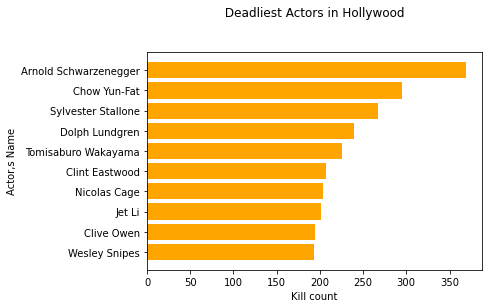

In [20]:
import matplotlib.pyplot as plt
deadliestActorData= pd.read_csv('actor_kill_counts.csv')
deadliestActorData.head()
sortDeadliestActorData=deadliestActorData.sort_values(by='Count',ascending=True)
actor_Names= deadliestActorData.Actor
plt.barh(sortDeadliestActorData['Actor'],sortDeadliestActorData['Count'],color="orange")
plt.xlabel("Kill count")
plt.ylabel("Actor,s Name")
plt.title(" Deadliest Actors in Hollywood \n\n ")
plt.show()


## Q9

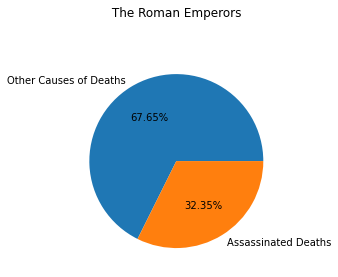

In [16]:
import matplotlib.pyplot as plt
romanData= pd.read_csv('roman-emperor-reigns.csv')
romanData.head()
lowerData= romanData.where(romanData.Cause_of_Death=="Assassinated").Cause_of_Death.count()
remaining= romanData.Cause_of_Death.count()-lowerData
label=["Other Causes of Deaths","Assassinated Deaths"]
plt.pie([remaining,lowerData],labels=label,autopct='%.2f%%')
plt.title(" The Roman Emperors \n\n")
plt.show()

## Q10

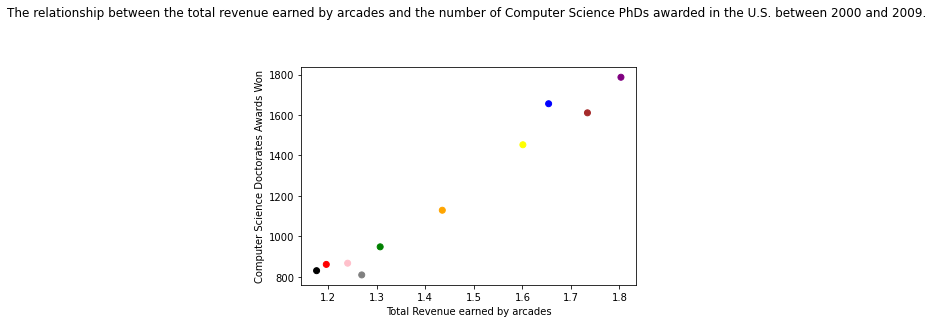

In [17]:
import matplotlib.pyplot as plt
revenueData= pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
Years=revenueData.Year
Arcade= revenueData['Total Arcade Revenue (billions)']
PhD=revenueData['Computer Science Doctorates Awarded (US)']
colors=["Red","Black","Grey","Pink","Green","Orange","Yellow","Blue","Purple","Brown"]
plt.scatter(Arcade,PhD,color=colors)
plt.xlabel("Total Revenue earned by arcades")
plt.ylabel("Computer Science Doctorates Awards Won")
plt.title("The relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. \n\n\n")
plt.show()